In [ ]:
import pandas as pd
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [ ]:
import scipy.stats as ss

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath= '/content/drive/MyDrive/CodeOp/us_wildfires_filled.csv'

us_wildfires = pd.read_csv(filepath)

In [ ]:
#Checking shape and columns
us_wildfires.shape
#us_wildfires.columns

(1682341, 22)

In [ ]:
#Checking datetimes
us_wildfires['DISCOVERY_DATE'].dtype #back to 'object' again so changing in case it's important

dtype('O')

In [ ]:
us_wildfires['DISCOVERY_DATE'] = pd.to_datetime(us_wildfires["DISCOVERY_DATE"], format = "%Y-%m-%d")
us_wildfires['CONT_DATE'] = pd.to_datetime(us_wildfires["CONT_DATE"], format = "%Y-%m-%d")

In [ ]:
us_wildfires['DISCOVERY_DATE'].dtype

dtype('<M8[ns]')

In [ ]:
us_wildfires.isna().sum() #Just checking all looks good!

OBJECTID                     0
NWCG_REPORTING_AGENCY        0
NWCG_REPORTING_UNIT_ID       0
FIRE_NAME                    0
FIRE_YEAR                    0
DISCOVERY_DATE               0
NWCG_CAUSE_CLASSIFICATION    0
NWCG_GENERAL_CAUSE           0
NWCG_CAUSE_AGE_CATEGORY      0
CONT_DATE                    0
FIRE_SIZE                    0
FIRE_SIZE_CLASS              0
LATITUDE                     0
LONGITUDE                    0
OWNER_DESCR                  0
DURATION                     0
COUNTY                       0
STATE                        0
PRECIPITATION                0
TEMPERATURE                  0
WIND_SPEED                   0
ELEVATION                    0
dtype: int64

In [ ]:
us_wildfires.columns.to_list()

['OBJECTID',
 'NWCG_REPORTING_AGENCY',
 'NWCG_REPORTING_UNIT_ID',
 'FIRE_NAME',
 'FIRE_YEAR',
 'DISCOVERY_DATE',
 'NWCG_CAUSE_CLASSIFICATION',
 'NWCG_GENERAL_CAUSE',
 'NWCG_CAUSE_AGE_CATEGORY',
 'CONT_DATE',
 'FIRE_SIZE',
 'FIRE_SIZE_CLASS',
 'LATITUDE',
 'LONGITUDE',
 'OWNER_DESCR',
 'DURATION',
 'COUNTY',
 'STATE',
 'PRECIPITATION',
 'TEMPERATURE',
 'WIND_SPEED',
 'ELEVATION']

In [ ]:
us_wildfires['NWCG_GENERAL_CAUSE'].value_counts()

NWCG_GENERAL_CAUSE
Undetermined                           453517
Debris and open burning                405877
Natural                                231547
Arson                                  219102
Equipment and vehicle use              141487
Recreation and ceremony                 69984
Misuse of fire by a minor               43018
Smoking                                 42540
Power supply                            29661
Railroad operations and maintenance     19660
Fireworks                               15376
Other causes                             8149
Firearms and explosives use              2423
Name: count, dtype: int64

In [ ]:
us_wildfires['FIRE_NAME'].value_counts()

FIRE_NAME
UNKNOWN                634750
GRASS FIRE               6961
LOCAL FIRE               1374
DENVER                    861
RIVER                     650
                        ...  
FY2002-SEMINOLE-030         1
FY2002-SEMINOLE-029         1
FY2002-SEMINOLE-028         1
FY2002-SEMINOLE-027         1
TAYLOR POND                 1
Name: count, Length: 604139, dtype: int64

In [ ]:
to_drop = ['OBJECTID', 'LATITUDE', 'LONGITUDE']
us_wildfires = us_wildfires.drop(us_wildfires[to_drop], axis=1)

In [ ]:
model_data = us_wildfires.drop('FIRE_NAME', axis=1)

In [ ]:
#Discovery Date - Day of Week

test = model_data.head()
test['Day_of_Week'] = test['DISCOVERY_DATE'].dt.dayofweek

<ipython-input-15-a49a1f717b85>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Day_of_Week'] = test['DISCOVERY_DATE'].dt.dayofweek


In [ ]:
test[['DISCOVERY_DATE', 'Day_of_Week']] #Monday = 0, Sunday = 6

,DISCOVERY_DATE,Day_of_Week
0,2005-02-02,2
1,2004-05-12,2
2,2004-05-31,0
3,2004-06-28,0
4,2004-06-28,0


In [ ]:
model_data['DAY_OF_WEEK'] = model_data['DISCOVERY_DATE'].dt.dayofweek

In [ ]:
model_data['DAY_OF_YEAR'] = model_data['DISCOVERY_DATE'].dt.dayofyear

In [ ]:
model_data[['DISCOVERY_DATE', 'DAY_OF_YEAR']].head()

,DISCOVERY_DATE,DAY_OF_YEAR
0,2005-02-02,33
1,2004-05-12,133
2,2004-05-31,152
3,2004-06-28,180
4,2004-06-28,180


In [ ]:
date_drop = ['DISCOVERY_DATE', 'CONT_DATE']
model_data = model_data.drop(model_data[date_drop], axis=1)

In [ ]:
model_data.columns

Index(['NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID', 'FIRE_YEAR',
       'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE',
       'NWCG_CAUSE_AGE_CATEGORY', 'FIRE_SIZE', 'FIRE_SIZE_CLASS',
       'OWNER_DESCR', 'DURATION', 'COUNTY', 'STATE', 'PRECIPITATION',
       'TEMPERATURE', 'WIND_SPEED', 'ELEVATION', 'DAY_OF_WEEK', 'DAY_OF_YEAR'],
      dtype='object')

In [ ]:
model_data = model_data.drop('FIRE_SIZE_CLASS', axis=1)

In [ ]:
model_data = model_data.drop('NWCG_REPORTING_UNIT_ID', axis=1)

In [ ]:
model_data['NWCG_CAUSE_CLASSIFICATION'].value_counts()

NWCG_CAUSE_CLASSIFICATION
Human           1337030
Natural          231547
undetermined     113764
Name: count, dtype: int64

In [ ]:
model_data['NWCG_GENERAL_CAUSE'].value_counts()

NWCG_GENERAL_CAUSE
Undetermined                           453517
Debris and open burning                405877
Natural                                231547
Arson                                  219102
Equipment and vehicle use              141487
Recreation and ceremony                 69984
Misuse of fire by a minor               43018
Smoking                                 42540
Power supply                            29661
Railroad operations and maintenance     19660
Fireworks                               15376
Other causes                             8149
Firearms and explosives use              2423
Name: count, dtype: int64

In [ ]:
model_data['NWCG_CAUSE_AGE_CATEGORY'].value_counts()

NWCG_CAUSE_AGE_CATEGORY
Adult or Natural    1632874
Minor                 49467
Name: count, dtype: int64

In [ ]:
# Group by county and count unique states
county_state_count = model_data.groupby('COUNTY')['STATE'].nunique()

# Filter counties with multiple states
counties_multiple_states = county_state_count[county_state_count > 1]

In [ ]:
counties_multiple_states

COUNTY
Adair County         4
Adams County        12
Albany County        2
Alexander County     2
Allegany County      2
                    ..
Worth County         3
Wright County        3
Wyoming County       3
York County          5
Yuma County          2
Name: STATE, Length: 417, dtype: int64

In [ ]:
model_data['COUNTY_STATE'] = model_data['COUNTY'] + str(" ") + model_data['STATE']

In [ ]:
model_data[['COUNTY_STATE', 'COUNTY', 'STATE']].head()

,COUNTY_STATE,COUNTY,STATE
0,Plumas County CA,Plumas County,CA
1,El Dorado County CA,El Dorado County,CA
2,Placer County CA,Placer County,CA
3,Alpine County CA,Alpine County,CA
4,Alpine County CA,Alpine County,CA


In [ ]:
model_data = model_data.drop('COUNTY', axis=1)

In [ ]:
model_data.columns

Index(['NWCG_REPORTING_AGENCY', 'FIRE_YEAR', 'NWCG_CAUSE_CLASSIFICATION',
       'NWCG_GENERAL_CAUSE', 'NWCG_CAUSE_AGE_CATEGORY', 'FIRE_SIZE',
       'OWNER_DESCR', 'DURATION', 'STATE', 'PRECIPITATION', 'TEMPERATURE',
       'WIND_SPEED', 'ELEVATION', 'DAY_OF_WEEK', 'DAY_OF_YEAR',
       'COUNTY_STATE'],
      dtype='object')

In [ ]:
model_data['COUNTY_STATE'].value_counts()

COUNTY_STATE
Orange County CA         18449
Maricopa County AZ       16834
Gila County AZ           14117
San Diego County CA       9908
Los Angeles County CA     9631
                         ...  
Darke County OH              1
Edgar County IL              1
Wayne County IL              1
Clark County IL              1
Portage County OH            1
Name: count, Length: 3034, dtype: int64

In [ ]:
model_data['COUNTY_STATE'] = model_data['COUNTY_STATE'].astype('category')
model_data['COUNTY_STATE'] = model_data['COUNTY_STATE'].cat.codes.astype(int) # Numerical values
model_data['COUNTY_STATE'].value_counts()

COUNTY_STATE
2070    18449
1729    16834
1008    14117
2423     9908
1660     9631
        ...  
701         1
826         1
2890        1
509         1
2240        1
Name: count, Length: 3034, dtype: int64

In [ ]:
model_data['STATE'] = model_data['STATE'].astype('category')
model_data['STATE'] = model_data['STATE'].cat.codes.astype(int) # Numerical values
model_data['STATE'].value_counts()

STATE
3     182514
40    167191
8     121173
31     94160
24     91157
2      75034
7      68885
4      60923
37     52556
22     52108
0      50869
34     49090
23     39348
33     36179
20     35415
1      33600
41     30585
38     29911
44     29566
10     28314
39     27357
29     27093
14     26861
45     26185
15     25304
28     21988
42     18815
13     18341
25     16951
46     16586
19     16148
30     15065
21     14765
47     14012
35     13141
18     11276
26     11201
16      8079
9       5583
32      5402
17      3941
11      2814
27      2271
12      1652
43      1610
36      1058
6        212
5         52
Name: count, dtype: int64

In [ ]:
def _transform_column_into_dummies(dataframe, name_of_column):
    dummies = pd.get_dummies(dataframe[name_of_column], prefix=f"{name_of_column} = ")

    dataframe = pd.concat([dataframe, dummies], axis=1)

    dataframe = dataframe.drop([name_of_column], axis=1)

    return dataframe

In [ ]:
model_data = _transform_column_into_dummies(model_data, 'NWCG_REPORTING_AGENCY')

In [ ]:
model_data.columns

Index(['FIRE_YEAR', 'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE',
       'NWCG_CAUSE_AGE_CATEGORY', 'FIRE_SIZE', 'OWNER_DESCR', 'DURATION',
       'STATE', 'PRECIPITATION', 'TEMPERATURE', 'WIND_SPEED', 'ELEVATION',
       'DAY_OF_WEEK', 'DAY_OF_YEAR', 'COUNTY_STATE',
       'NWCG_REPORTING_AGENCY = _Bureau of Indian Affairs',
       'NWCG_REPORTING_AGENCY = _Bureau of Land Management',
       'NWCG_REPORTING_AGENCY = _Bureau of Reclamation',
       'NWCG_REPORTING_AGENCY = _Department of Defense',
       'NWCG_REPORTING_AGENCY = _Department of Energy',
       'NWCG_REPORTING_AGENCY = _Fish and Wildlife Service',
       'NWCG_REPORTING_AGENCY = _Forest Service',
       'NWCG_REPORTING_AGENCY = _Interagency Organization',
       'NWCG_REPORTING_AGENCY = _National Park Service',
       'NWCG_REPORTING_AGENCY = _State, County, or Local Organization',
       'NWCG_REPORTING_AGENCY = _Tribal Organization'],
      dtype='object')

In [ ]:
model_data = _transform_column_into_dummies(model_data, 'NWCG_CAUSE_CLASSIFICATION')
model_data = _transform_column_into_dummies(model_data, 'NWCG_CAUSE_AGE_CATEGORY')


In [ ]:
model_data.columns

Index(['FIRE_YEAR', 'NWCG_GENERAL_CAUSE', 'FIRE_SIZE', 'OWNER_DESCR',
       'DURATION', 'STATE', 'PRECIPITATION', 'TEMPERATURE', 'WIND_SPEED',
       'ELEVATION', 'DAY_OF_WEEK', 'DAY_OF_YEAR', 'COUNTY_STATE',
       'NWCG_REPORTING_AGENCY = _Bureau of Indian Affairs',
       'NWCG_REPORTING_AGENCY = _Bureau of Land Management',
       'NWCG_REPORTING_AGENCY = _Bureau of Reclamation',
       'NWCG_REPORTING_AGENCY = _Department of Defense',
       'NWCG_REPORTING_AGENCY = _Department of Energy',
       'NWCG_REPORTING_AGENCY = _Fish and Wildlife Service',
       'NWCG_REPORTING_AGENCY = _Forest Service',
       'NWCG_REPORTING_AGENCY = _Interagency Organization',
       'NWCG_REPORTING_AGENCY = _National Park Service',
       'NWCG_REPORTING_AGENCY = _State, County, or Local Organization',
       'NWCG_REPORTING_AGENCY = _Tribal Organization',
       'NWCG_CAUSE_CLASSIFICATION = _Human',
       'NWCG_CAUSE_CLASSIFICATION = _Natural',
       'NWCG_CAUSE_CLASSIFICATION = _undetermined',


In [ ]:
model_data = _transform_column_into_dummies(model_data, 'OWNER_DESCR')

In [ ]:
model_data.columns

Index(['FIRE_YEAR', 'NWCG_GENERAL_CAUSE', 'FIRE_SIZE', 'DURATION', 'STATE',
       'PRECIPITATION', 'TEMPERATURE', 'WIND_SPEED', 'ELEVATION',
       'DAY_OF_WEEK', 'DAY_OF_YEAR', 'COUNTY_STATE',
       'NWCG_REPORTING_AGENCY = _Bureau of Indian Affairs',
       'NWCG_REPORTING_AGENCY = _Bureau of Land Management',
       'NWCG_REPORTING_AGENCY = _Bureau of Reclamation',
       'NWCG_REPORTING_AGENCY = _Department of Defense',
       'NWCG_REPORTING_AGENCY = _Department of Energy',
       'NWCG_REPORTING_AGENCY = _Fish and Wildlife Service',
       'NWCG_REPORTING_AGENCY = _Forest Service',
       'NWCG_REPORTING_AGENCY = _Interagency Organization',
       'NWCG_REPORTING_AGENCY = _National Park Service',
       'NWCG_REPORTING_AGENCY = _State, County, or Local Organization',
       'NWCG_REPORTING_AGENCY = _Tribal Organization',
       'NWCG_CAUSE_CLASSIFICATION = _Human',
       'NWCG_CAUSE_CLASSIFICATION = _Natural',
       'NWCG_CAUSE_CLASSIFICATION = _undetermined',
       'NWCG_CA

In [ ]:
model_data.to_csv('/content/drive/MyDrive/CodeOp/model_data.csv', index=False)

In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
cramers_v_value = cramers_v(model_data['FIRE_YEAR'], model_data['NWCG_GENERAL_CAUSE'])

In [ ]:
cramers_v_value

0.06980133959246504

In [ ]:
def analyze_cramer_v(df, target_column):
    results = {}
    for column in df.columns:
        if column != target_column:
            cramers_v_value = cramers_v(df[column], df[target_column])
            results[column] = cramers_v_value
    return results

In [ ]:
cramer_v_results = analyze_cramer_v(model_data, 'NWCG_GENERAL_CAUSE')

In [ ]:
cramer_v_results

{'FIRE_YEAR': 0.06980133959246504,
 'FIRE_SIZE': 0.11615536120349078,
 'DURATION': 0.10804549985333158,
 'STATE': 0.2287467084102659,
 'PRECIPITATION': 0.1084835475989575,
 'TEMPERATURE': 0.10877711033756358,
 'WIND_SPEED': 0.06115973382157366,
 'ELEVATION': 0.2824007859741912,
 'DAY_OF_WEEK': 0.02917109423879,
 'DAY_OF_YEAR': 0.16221365651315206,
 'COUNTY_STATE': 0.3243726724644847,
 'NWCG_REPORTING_AGENCY = _Bureau of Indian Affairs': 0.20620009604036213,
 'NWCG_REPORTING_AGENCY = _Bureau of Land Management': 0.296027880882559,
 'NWCG_REPORTING_AGENCY = _Bureau of Reclamation': 0.0026335331362856767,
 'NWCG_REPORTING_AGENCY = _Department of Defense': 0.013303371003920492,
 'NWCG_REPORTING_AGENCY = _Department of Energy': 0.004270895056734019,
 'NWCG_REPORTING_AGENCY = _Fish and Wildlife Service': 0.035284191363987354,
 'NWCG_REPORTING_AGENCY = _Forest Service': 0.4293840918218818,
 'NWCG_REPORTING_AGENCY = _Interagency Organization': 0.0074245879921113166,
 'NWCG_REPORTING_AGENCY = _

In [ ]:
cramer_v_df = pd.DataFrame(list(cramer_v_results.items()), columns=['Features', 'Cramer_V'])

cramer_v_df_sorted = cramer_v_df.sort_values(by='Cramer_V', ascending=False)

cramer_v_df_sorted

,Features,Cramer_V
23,NWCG_CAUSE_CLASSIFICATION = _Natural,0.999997
26,NWCG_CAUSE_AGE_CATEGORY = _Minor,0.947183
25,NWCG_CAUSE_AGE_CATEGORY = _Adult or Natural,0.947183
22,NWCG_CAUSE_CLASSIFICATION = _Human,0.830325
20,"NWCG_REPORTING_AGENCY = _State, County, or Loc...",0.474830
34,OWNER_DESCR = _FOREST SERVICE,0.455606
24,NWCG_CAUSE_CLASSIFICATION = _undetermined,0.443292
17,NWCG_REPORTING_AGENCY = _Forest Service,0.429384
37,OWNER_DESCR = _NOT SPECIFIED,0.331751
10,COUNTY_STATE,0.324373


In [ ]:
model_2 = model_data.filter(regex=r'^(?!NWCG_CAUSE_CLASSIFICATION|NWCG_CAUSE_AGE_CATEGORY).*')
model_2.columns

Index(['FIRE_YEAR', 'NWCG_GENERAL_CAUSE', 'FIRE_SIZE', 'DURATION', 'STATE',
       'PRECIPITATION', 'TEMPERATURE', 'WIND_SPEED', 'ELEVATION',
       'DAY_OF_WEEK', 'DAY_OF_YEAR', 'COUNTY_STATE',
       'NWCG_REPORTING_AGENCY = _Bureau of Indian Affairs',
       'NWCG_REPORTING_AGENCY = _Bureau of Land Management',
       'NWCG_REPORTING_AGENCY = _Bureau of Reclamation',
       'NWCG_REPORTING_AGENCY = _Department of Defense',
       'NWCG_REPORTING_AGENCY = _Department of Energy',
       'NWCG_REPORTING_AGENCY = _Fish and Wildlife Service',
       'NWCG_REPORTING_AGENCY = _Forest Service',
       'NWCG_REPORTING_AGENCY = _Interagency Organization',
       'NWCG_REPORTING_AGENCY = _National Park Service',
       'NWCG_REPORTING_AGENCY = _State, County, or Local Organization',
       'NWCG_REPORTING_AGENCY = _Tribal Organization',
       'OWNER_DESCR = _BUREAU OF INDIAN AFFAIRS',
       'OWNER_DESCR = _BUREAU OF LAND MANAGEMENT',
       'OWNER_DESCR = _BUREAU OF RECLAMATION', 'OWNER_DESC

In [ ]:
cramer_v_results2 = analyze_cramer_v(model_2, 'NWCG_GENERAL_CAUSE')

In [ ]:
cramer_v_df2 = pd.DataFrame(list(cramer_v_results2.items()), columns=['Features', 'Cramer_V'])

cramer_v_df_sorted2 = cramer_v_df2.sort_values(by='Cramer_V', ascending=False)

cramer_v_df_sorted2

,Features,Cramer_V
20,"NWCG_REPORTING_AGENCY = _State, County, or Loc...",0.474830
29,OWNER_DESCR = _FOREST SERVICE,0.455606
17,NWCG_REPORTING_AGENCY = _Forest Service,0.429384
32,OWNER_DESCR = _NOT SPECIFIED,0.331751
10,COUNTY_STATE,0.324373
23,OWNER_DESCR = _BUREAU OF LAND MANAGEMENT,0.315846
12,NWCG_REPORTING_AGENCY = _Bureau of Land Manage...,0.296028
7,ELEVATION,0.282401
3,STATE,0.228747
33,OWNER_DESCR = _PRIVATE,0.228391


In [ ]:
model_3 = model_2.filter(regex=r'^(?!NWCG_REPORTING_AGENCY).*')
model_3.columns

Index(['FIRE_YEAR', 'NWCG_GENERAL_CAUSE', 'FIRE_SIZE', 'DURATION', 'STATE',
       'PRECIPITATION', 'TEMPERATURE', 'WIND_SPEED', 'ELEVATION',
       'DAY_OF_WEEK', 'DAY_OF_YEAR', 'COUNTY_STATE',
       'OWNER_DESCR = _BUREAU OF INDIAN AFFAIRS',
       'OWNER_DESCR = _BUREAU OF LAND MANAGEMENT',
       'OWNER_DESCR = _BUREAU OF RECLAMATION', 'OWNER_DESCR = _COUNTY',
       'OWNER_DESCR = _FEDERAL', 'OWNER_DESCR = _FISH AND WILDLIFE SERVICE',
       'OWNER_DESCR = _FOREIGN', 'OWNER_DESCR = _FOREST SERVICE',
       'OWNER_DESCR = _MUNICIPAL/LOCAL',
       'OWNER_DESCR = _NATIONAL PARK SERVICE', 'OWNER_DESCR = _NOT SPECIFIED',
       'OWNER_DESCR = _PRIVATE', 'OWNER_DESCR = _STATE',
       'OWNER_DESCR = _TRIBAL'],
      dtype='object')

In [ ]:
cramer_v_results3 = analyze_cramer_v(model_3, 'NWCG_GENERAL_CAUSE')

cramer_v_df3 = pd.DataFrame(list(cramer_v_results3.items()), columns=['Features', 'Cramer_V'])

cramer_v_df_sorted3 = cramer_v_df3.sort_values(by='Cramer_V', ascending=False)

cramer_v_df_sorted3

,Features,Cramer_V
18,OWNER_DESCR = _FOREST SERVICE,0.455606
21,OWNER_DESCR = _NOT SPECIFIED,0.331751
10,COUNTY_STATE,0.324373
12,OWNER_DESCR = _BUREAU OF LAND MANAGEMENT,0.315846
7,ELEVATION,0.282401
3,STATE,0.228747
22,OWNER_DESCR = _PRIVATE,0.228391
11,OWNER_DESCR = _BUREAU OF INDIAN AFFAIRS,0.197152
9,DAY_OF_YEAR,0.162214
1,FIRE_SIZE,0.116155


In [ ]:
model_4 = model_3.filter(regex=r'^(?!OWNER_DESCR).*')
model_4.columns

Index(['FIRE_YEAR', 'NWCG_GENERAL_CAUSE', 'FIRE_SIZE', 'DURATION', 'STATE',
       'PRECIPITATION', 'TEMPERATURE', 'WIND_SPEED', 'ELEVATION',
       'DAY_OF_WEEK', 'DAY_OF_YEAR', 'COUNTY_STATE'],
      dtype='object')

In [ ]:
cramer_v_results4 = analyze_cramer_v(model_4, 'NWCG_GENERAL_CAUSE')

cramer_v_df4 = pd.DataFrame(list(cramer_v_results4.items()), columns=['Features', 'Cramer_V'])

cramer_v_df_sorted4 = cramer_v_df4.sort_values(by='Cramer_V', ascending=False)

cramer_v_df_sorted4

,Features,Cramer_V
10,COUNTY_STATE,0.324373
7,ELEVATION,0.282401
3,STATE,0.228747
9,DAY_OF_YEAR,0.162214
1,FIRE_SIZE,0.116155
5,TEMPERATURE,0.108777
4,PRECIPITATION,0.108484
2,DURATION,0.108045
0,FIRE_YEAR,0.069801
6,WIND_SPEED,0.061160


In [ ]:
import pandas as pd

filepath= '/content/drive/MyDrive/CodeOp/model_data.csv'

eda_data = pd.read_csv(filepath)

In [ ]:
from sklearn.cluster import KMeans
import scipy
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt

In [ ]:
eda_data['COUNTY_STATE'] = eda_data['COUNTY_STATE'].astype('category')

In [ ]:
eda_data['STATE'] = eda_data['STATE'].astype('category')

In [ ]:
eda_data = _transform_column_into_dummies(eda_data, 'STATE')

In [ ]:
eda_data = eda_data.drop('COUNTY_STATE', axis=1)

In [ ]:
from sklearn.decomposition import PCA
pca_data = eda_data.drop('NWCG_GENERAL_CAUSE', axis=1)

pca = PCA(n_components=4)
pca_components = pca.fit_transform(pca_data)

In [ ]:
pca.explained_variance_ratio_

array([9.37213322e-01, 6.14876684e-02, 1.27570724e-03, 1.07026972e-05])

In [ ]:
pca_dataframe = pd.DataFrame(pca_components, columns=["PC1", "PC2", "PC3", "PC4"])

<Axes: xlabel='PC1', ylabel='PC2'>

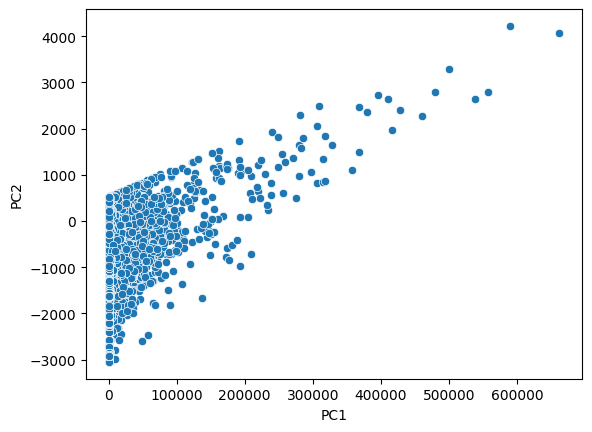

In [ ]:
import seaborn as sns

sns.scatterplot(
    data = pca_dataframe,
    x = "PC1",
    y = "PC2"
)

In [ ]:
import scipy
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt


## Step 1: Use PC1 and PC2 for hierarchical clustering.
clusters = hierarchy.linkage(pca_dataframe[["PC1", "PC2"]], method="complete")

## Step 2: Show the dendrogram.
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(clusters)
plt.show()

## Step 3: Perform Hierarchical Clustering using your chosen amount of clusters.
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3)
Y_preds = clustering.fit_predict(pca_dataframe[["PC1", "PC2"]])

pca_dataframe["predicted_hierarchical_cluster"] = Y_preds

## Step 4: Plot the hierarchical clustering results. Do they make sense?
sns.scatterplot(
    data = pca_dataframe,
    x = "PC1",
    y = "PC2",
    hue = "predicted_hierarchical_cluster"
)